In [3]:
%matplotlib inline
import pandas as pd

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Le dossier noir,1955
1,All Inclusive ili Vsyo vklyucheno!,2011
2,Mediate This,2016
3,Dummy,2002
4,13 Score,2014


In [6]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [25]:
c = titles.groupby('title')
grp = c.size()

In [24]:
grp.sort_values(ascending=False).head()

title
Hamlet                  19
Macbeth                 15
Carmen                  14
The Three Musketeers    12
Maya                    11
dtype: int64

### Which three years of the 1930s saw the most films released?

In [31]:
t = titles[titles.year //10 * 10 == 1930]
grp = t.groupby('year').size()
grp.sort_values(ascending=False)[:3]

year
1937    1189
1936    1130
1938    1117
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

In [35]:
p = titles.groupby(titles.year //10 * 10).size()

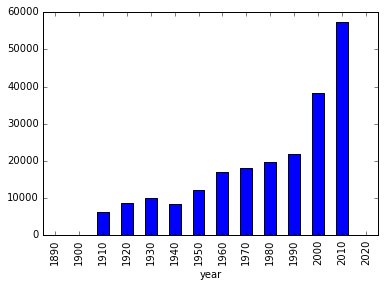

In [40]:
p.plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

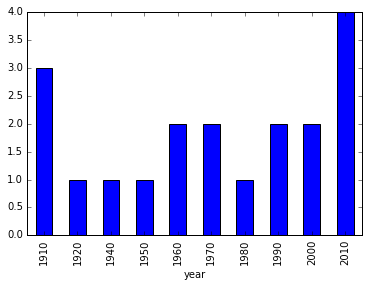

In [45]:
ham = titles[titles.title == 'Hamlet']
ham.groupby(ham.year // 10 * 10).size().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

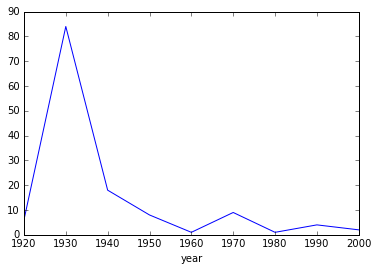

In [46]:
rus = cast[cast.character == 'Rustler']
rus.groupby(rus.year //10 *10).size().plot()

### Plot the number of "Hamlet" characters each decade.

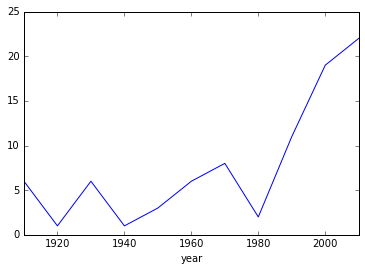

In [47]:
h = cast[cast.character == 'Hamlet']
h.groupby(h.year //10 * 10).size().plot()

### What are the 11 most common character names in movie history?

In [51]:
c = cast.groupby('character').size()
c.sort_values(ascending=False)[:11]

character
Himself        18691
Dancer         11409
Extra           9625
Reporter        7768
Doctor          7022
Policeman       6613
Student         6579
Nurse           6277
Bartender       6251
Party Guest     6238
Minor Role      6062
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [55]:
c = cast[cast.character == 'Herself']
cc = c.groupby('name').size()
cc.sort_values(ascending=False)[:10]

name
Joyce Brothers        14
Queen Elizabeth II    11
Margaret Thatcher      8
Mary Jo Pehl           7
Joan Rivers            7
Lili?n Garc?a          6
Kareena Kapoor         5
Hillary Clinton        5
Rekha                  5
Marilyn Monroe         5
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [56]:
c = cast[cast.character == 'Himself']
cc = c.groupby('name').size()
cc.sort_values(ascending=False)[:10]

name
Adolf Hitler             96
Richard Nixon            42
Ronald Reagan            33
John F. Kennedy          27
Ron Jeremy               24
Franklin D. Roosevelt    20
Winston Churchill        20
George W. Bush           20
Bill Clinton             20
Martin Luther King       19
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [59]:
c = cast[cast.year == 1945]
c = c.groupby('name').size()
c.sort_values(ascending=False).head()

name
Emmett Vogan       39
Sam (II) Harris    30
Harold Miller      29
Bess Flowers       28
Nolan Leary        27
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [60]:
c = cast[cast.year == 1985]
c = c.groupby('name').size()
c.sort_values(ascending=False).head()

name
Mammootty        20
Shakti Kapoor    19
Sukumari         18
Lou Scheimer     15
Mohanlal         14
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

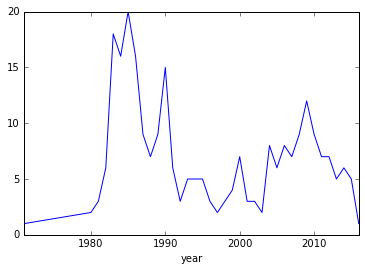

In [61]:
mam = cast[cast.name == 'Mammootty']
mam.groupby('year').size().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [65]:
c = cast[cast.character.str.startswith('Patron in')]
c = c.groupby('character').size()
c.sort_values(ascending=False)[:10]

character
Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in Club                   3
Patron in restaurant             3
Patron in cabaret                3
Patron in Restaurant             3
Patron in Quiet Bar              2
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [66]:
c = cast[cast.character.str.startswith('Science')]
c = c.groupby('character').size()
c.sort_values(ascending=False)[:10]

character
Science Teacher         55
Science Student          9
Science Fair Student     9
Science Club Member      5
Science Fair Judge       5
Science Reporter         5
Science Promo Cadet      4
Science Kid              4
Science Officer          3
Science teacher          3
dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

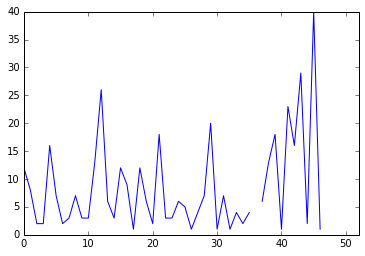

In [109]:
s = cast[cast.name == 'Judi Dench']
s = s.set_index('year')
s = s.sort_index()
f = s.n
f = f.reset_index()
f.n.plot()

### Plot the n-values of Cary Grant's roles through his career.

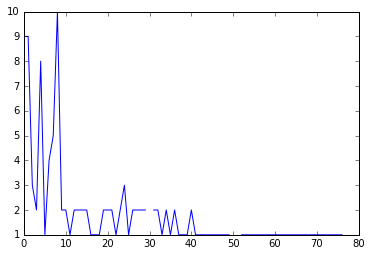

In [111]:
s = cast[cast.name == 'Cary Grant']
s = s.set_index('year')
s = s.sort_index()
f = s.n
f = f.reset_index()
f.n.plot()

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

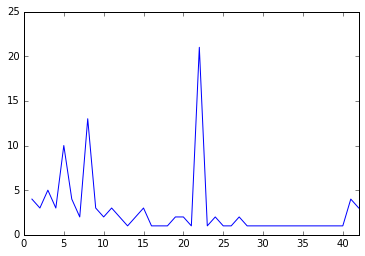

In [113]:
s = cast[cast.name == 'Sidney Poitier']
s = s.set_index('year')
s = s.sort_index()
f = s.n
f = f.reset_index()
f.n.plot()

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [118]:
c = cast[(cast.n == 1) & (cast.year // 10 * 10 == 1950)]
c = c.groupby('type').size()
c

type
actor      6440
actress    2861
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [119]:
c = cast[(cast.n == 2) & (cast.year // 10 * 10 == 1950)]
c = c.groupby('type').size()
c

type
actor      4433
actress    4444
dtype: int64